<a href="https://colab.research.google.com/github/Gnome101/MAT_422/blob/main/Module_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tabulate import tabulate

def print_matrix(matrix, name):
    print(f"\n{name}:")
   #Using tabulate to make the matrix look better
    print(tabulate(matrix, tablefmt="grid", floatfmt=".4f"))

# 1.4.1. Singular value decomposition
This is a technique to factorize a matrix into three other matrices.

Given a $m × n$ matrix $A$ can be written as $A = UΣV^T$

$U$ is an $m × m$ orthogonal matrix they are called the left singular vectors of $A$.

$Σ$ is  $m × n$ with a non-negative real numbers called singular values on the diagonal.

$V^T$ is the transpose of an $n × n$ orthogonal matrix $V$ where the columns of $V$ are the right singular vectors of $A$.

The applications of SVD are mostly in reducing the dimensionality of data, compressiong data. For example SVD can be used for image compression.

In [8]:
#We will implement SVD compression for an arbitary matrix
import numpy as np

# Define a sample matrix A (3x2 matrix)
A = np.array([[1, 2], [3, 4], [5, 6]])
print_matrix(A, "A Matrix")
# Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(A)

# We have to convert the sigma to a 2d diagonal
Sigma_diag = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(Sigma_diag, Sigma)

# Display the U matrix
print_matrix(U,"U Matrix" )
# Display the Sigma matrix
print_matrix(Sigma_diag,"Σ Matrix " )
# Display the V^T matrix
print_matrix(VT,"V^T Matrix " )
#Notice how the matrix looks the same as the original A
print_matrix(np.dot(U,np.dot(Sigma_diag,VT)), "Reconstructed A Matrix")



A Matrix:
+--------+--------+
| 1.0000 | 2.0000 |
+--------+--------+
| 3.0000 | 4.0000 |
+--------+--------+
| 5.0000 | 6.0000 |
+--------+--------+

U Matrix:
+---------+---------+---------+
| -0.2298 |  0.8835 |  0.4082 |
+---------+---------+---------+
| -0.5247 |  0.2408 | -0.8165 |
+---------+---------+---------+
| -0.8196 | -0.4019 |  0.4082 |
+---------+---------+---------+

Σ Matrix :
+--------+--------+
| 9.5255 | 0.0000 |
+--------+--------+
| 0.0000 | 0.5143 |
+--------+--------+
| 0.0000 | 0.0000 |
+--------+--------+

V^T Matrix :
+---------+---------+
| -0.6196 | -0.7849 |
+---------+---------+
| -0.7849 |  0.6196 |
+---------+---------+

Reconstructed A Matrix:
+--------+--------+
| 1.0000 | 2.0000 |
+--------+--------+
| 3.0000 | 4.0000 |
+--------+--------+
| 5.0000 | 6.0000 |
+--------+--------+


# 1.4.2. Low-rank matrix approximations
This is essentially finding the best way to approximate a matrix using another matrix with a lower rank.

The applications of this are the following:


1.   Compression: The low-rank approximation can provide a compressed version of the original matrix with some loss. Essentially it can reduce a $m × n$ matrix described by $mn$ numbers to $k(m +n)$.
2.   Updating a ML Model: Fine-tuning large machine learning models. A paper in 2021 found can use low rank matrix approximaitons to train a model with less parameters.
3.  De-Noising: If $A$ is noisy then the low-rank approximation might throw out noise and give a more informative matrix.


In [11]:
#We will use the SVD decompostion from the previous example to create this one

# Set the target rank as 1
k = 1

# Truncate U, Sigma, and V^T to keep only the first k singular values
U_k = U[:, :k]
Sigma_k = Sigma_diag[:k, :k]
VT_k = VT[:k, :]

# Now we remake the low-rank approximation of A
A_low_rank = np.dot(U_k, np.dot(Sigma_k, VT_k))

A, A_low_rank


(array([[1, 2],
        [3, 4],
        [5, 6]]),
 array([[1.35662819, 1.71846235],
        [3.09719707, 3.92326845],
        [4.83776596, 6.12807454]]))

# 1.4.3. Principal component analysis

This is a technique that can help to reduce the dimensionality of data while perserving the inherent variance in the dataset. It is commonly applied for data compression, noise reduction, and feature extraction.

It works by transforming the data into a new coordinate system made up by its principal components which capture the largest amount of variance in the data.

The following covariance matrix $S$ is created to denote the variance of the matrix.
A covariance matrix is a square matrix that shows the covariance between pairs of variables in a dataset.

$S = \frac{1}{N - 1}XX^T$

Then the eigen values and eigenvectors are found for the covariance matrix. The eigen values represent the amount of variance from each principal component, while the eigen vectors represent the direction that the variance is maximized.

Then the data is projected  onto these principal components represented by $X_{reduced} = XV_k$




Matrix X:
+--------+---------+---------+---------+---------+
| 1.0000 |  2.0000 |  3.0000 |  4.0000 |  5.0000 |
+--------+---------+---------+---------+---------+
| 2.0000 |  4.0000 |  6.0000 |  8.0000 | 10.0000 |
+--------+---------+---------+---------+---------+
| 3.0000 |  6.0000 |  9.0000 | 12.0000 | 15.0000 |
+--------+---------+---------+---------+---------+
| 6.0000 | 12.0000 | 18.0000 | 24.0000 | 30.0000 |
+--------+---------+---------+---------+---------+
| 5.0000 | 10.0000 | 15.0000 | 20.0000 | 25.0000 |
+--------+---------+---------+---------+---------+

Reduced Data:
+----------+
| -17.7989 |
+----------+
| -10.3827 |
+----------+
|  -2.9665 |
+----------+
|  19.2821 |
+----------+
|  11.8659 |
+----------+

Calculated Reduced Data:
+----------+
| -17.7989 |
+----------+
| -10.3827 |
+----------+
|  -2.9665 |
+----------+
|  19.2821 |
+----------+
|  11.8659 |
+----------+


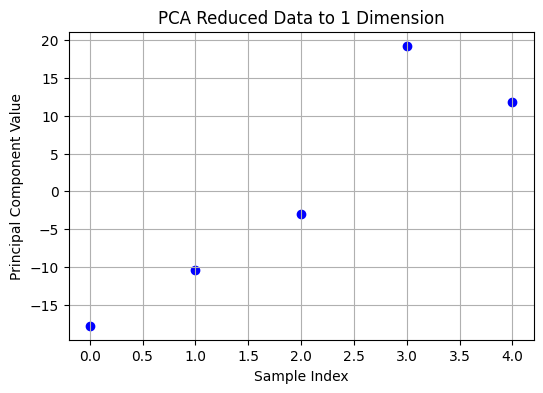

In [41]:
import matplotlib.pyplot as plt # add this for plotting
from sklearn.decomposition import PCA # add this to do PCA
# Apply PCA to reduce the dataset to 1 dimension

X = np.array([[1, 2, 3, 4, 5],
                         [2, 4, 6, 8, 10],
                         [3, 6, 9, 12, 15],
                         [6, 12, 18, 24, 30],
                         [5, 10, 15, 20, 25]])
print_matrix(X, "Matrix X")
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)
# We will confirm that this is correct here:
X_meaned = X - np.mean(X , axis = 0)
#Using this we can get the covariance matrix of the mean centered data
cov_mat = np.cov(X_meaned , rowvar = False)
#then we get the eigen values and vectors of the covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1] # we set it to -1 so its sorts descending order

#Now we have to sort the eigen values
#We sort them in a descending order so the first column will be the principal
#component that captures the highest variability
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]
#next we choose a subset of the principal components, and we choose the first one
eigenvector_subset = sorted_eigenvectors[:,0:1]
X_reduced_calculated = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

# Print the reduced dataset
# Notice how they are the same, so our calculation was correct
print_matrix(X_reduced,"Reduced Data")
print_matrix(X_reduced_calculated,"Calculated Reduced Data")

plt.figure(figsize=(6, 4))
plt.scatter(np.arange(len(X_reduced)), X_reduced, color='blue')
plt.title('PCA Reduced Data to 1 Dimension')
plt.xlabel('Sample Index')
plt.ylabel('Principal Component Value')
plt.grid(True)
plt.show()
#If you look at the plotted data point, you can see how it matches the pattern
# of the data
#Notice how the 4th row is the largest, so it has the largest projection along the principal component